In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
log_results_csv_dir = "log/coco/transpose_r_chsel/jupyter/exp5"
exp5_filelist = list(filter(lambda x: x.endswith("csv"), os.listdir(log_results_csv_dir)))
exp5_filelist.sort()


In [3]:

def load_csv_files(filelist, prefix, suffix):
    dfs = []
    for i in range(1, 17):
        # filepath_regex = os.path.join( f"{prefix}{i}{suffix}")
        filepath_regex =  f"{prefix}{i}{suffix}"
        filepath_regex = re.compile(filepath_regex)
        filename = list(filter(filepath_regex.match, exp5_filelist))[0]
        filepath = os.path.join(log_results_csv_dir, filename)
        if os.path.exists(filepath):
            dfs.append(pd.read_csv(filepath))
    return dfs

finetune_train_acc = load_csv_files(exp5_filelist, "exp5_step", "_finetune_.*_train_acc.csv")
finetune_val_acc = load_csv_files(exp5_filelist, "exp5_step", "_finetune_.*_val_acc.csv")
finetune_train_loss = load_csv_files(exp5_filelist, "exp5_step", "_finetune_.*_train_loss.csv")
finetune_val_loss = load_csv_files(exp5_filelist, "exp5_step", "_finetune_.*_val_loss.csv")


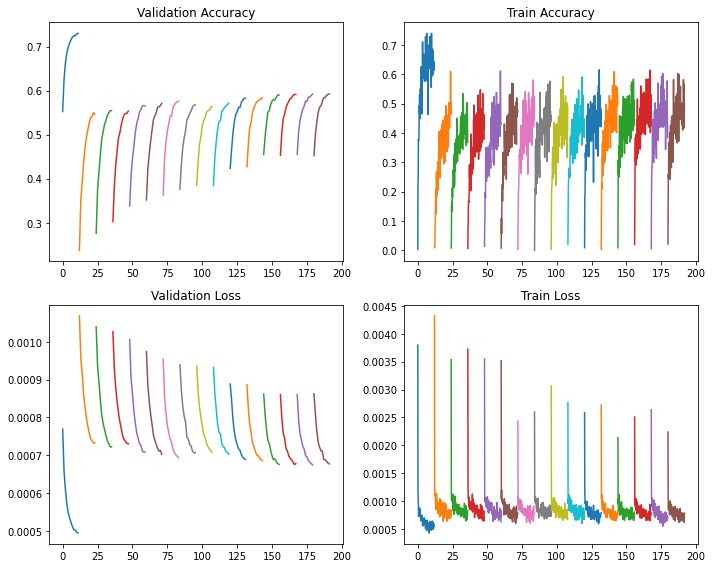

In [4]:

def plot_data(data_list, x_offset=12, y_offset=0, x_scale=1, y_scale=1, ax=None):
    if ax is None:
        ax = plt.gca()
    for i, data in enumerate(data_list):
        ax.plot((data['Step'] * x_scale ) + i * x_offset  , data['Value'] * y_scale)
    return ax
    

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_data(finetune_val_acc, ax=axs[0, 0])
axs[0, 0].set_title("Validation Accuracy")

plot_data(finetune_train_acc, x_scale=1/(84/12.0), x_offset=12, ax=axs[0, 1])
axs[0, 1].set_title("Train Accuracy")

plot_data(finetune_val_loss, x_offset=12, ax=axs[1, 0])
axs[1, 0].set_title("Validation Loss")

plot_data(finetune_train_loss, x_scale=1/(84/12.0), x_offset=12, ax=axs[1, 1])
axs[1, 1].set_title("Train Loss")

plt.tight_layout()

Text(0.5, 0.98, 'Evaluation Metrics over 16 rounds of pruning and finetuning - strategy 2')

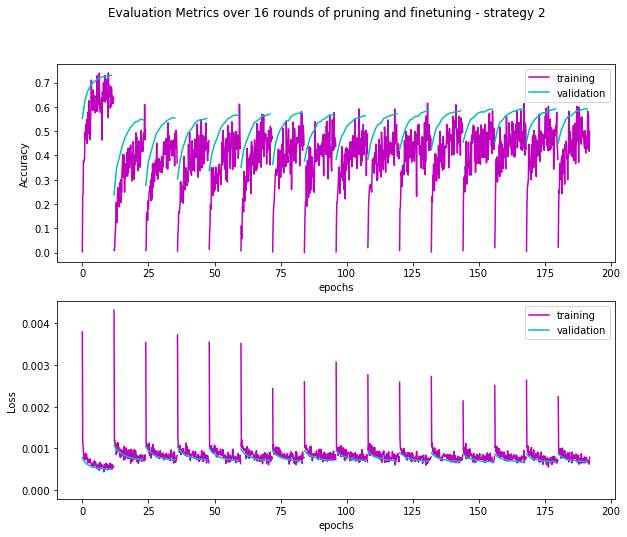

In [5]:

def plot_data(data_list, x_offset=12, y_offset=0, x_scale=1, y_scale=1, ax=None, c='c', label="l"):
    if ax is None:
        ax = plt.gca()
    for i, data in enumerate(data_list):
        ax.plot((data['Step'] * x_scale ) + i * x_offset  , data['Value'] * y_scale, color=c)
    return ax
    

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

plot_data(finetune_train_acc, x_scale=1/(84/12.0), x_offset=12, ax=axs[0], c='m', label="training")
plot_data(finetune_val_acc, ax=axs[0], label="validation")
# axs[0].set_title("Validation Accuracy")

axs[0].plot(0,0,color='m',label="training")
axs[0].plot(0,0,color='c',label="validation")
axs[1].plot(0,0,color='m',label="training")
axs[1].plot(0,0,color='c',label="validation")

axs[0].legend()
plot_data(finetune_train_loss, x_scale=1/(84/12.0), x_offset=12, ax=axs[1], c='m', label="training")
plot_data(finetune_val_loss, x_offset=12, ax=axs[1], label="validation")
# axs[1].set_title("Validation Loss")

axs[0].set_xlabel("epochs")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("Loss")
axs[1].legend()
fig.suptitle("Evaluation Metrics over 16 rounds of pruning and finetuning - strategy 2")
# plt.tight_layout()

NameError: name 'model_size_iter' is not defined

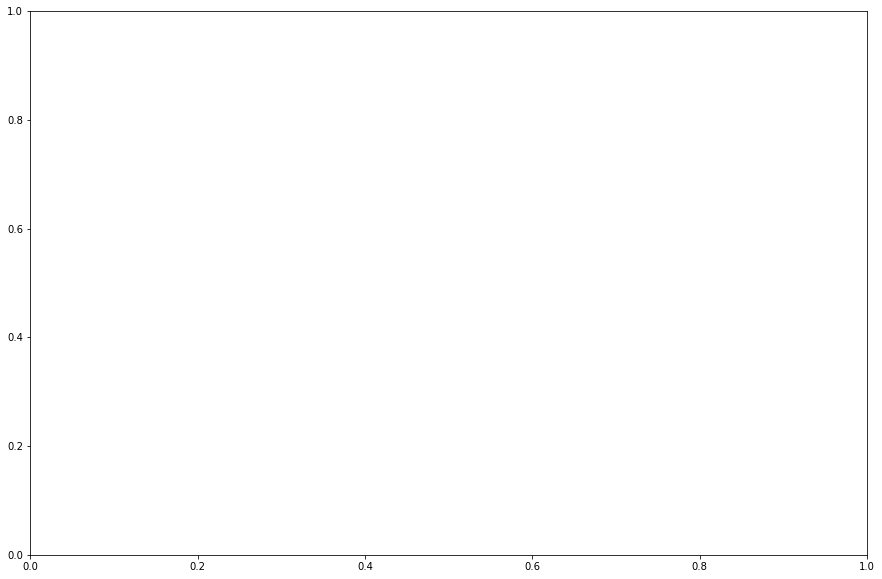

In [6]:




# exp5_model_size_iter = [4735825, 4605918, 4476708, 4376520, 4295517, 4220238, 4147165, 4082626, 4028562, 3987670, 3958666, 3931900,3908419,3888909,3870814,3855166,3840072]
# model_acc_iter = [0.75] + [data['Value'].iloc[-1] for data in finetune_val_acc]

# fig, axs = plt.subplots(figsize=(15,10))
# for i in range(len(exp5_model_size_iter)):
#     axs.scatter(1 - model_size_iter[i] / model_size_iter[0], model_acc_iter[i])
# axs.set_ylabel("Validation Accuracy")
# axs.set_xlabel("Sparsity")

# model_part1_size = 1444928
# fig, axs = plt.subplots()
# for i in range(len(exp5_model_size_iter)):
#     sparsity = 1 - (model_part1_size - (model_size_iter[0] - model_size_iter[i])) / model_part1_size
#     axs.scatter(sparsity, model_acc_iter[i])
# axs.set_ylabel("Validation Accuracy")
# axs.set_xlabel("Sparsity (only conv layers)")

Text(0.5, 1.0, 'Performance vs Sparsity - strategy 1 and 2')

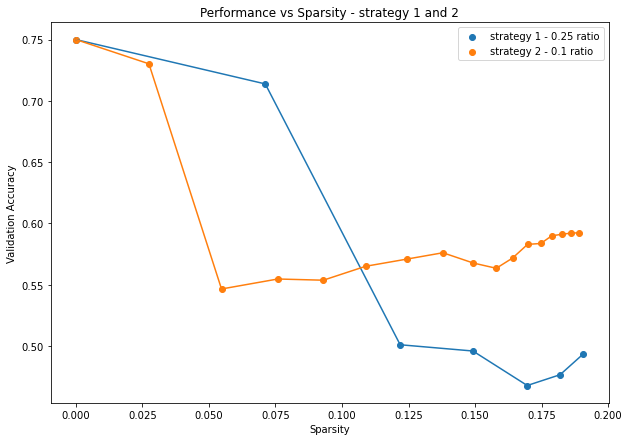

In [9]:
exp4_model_size_iter = [4735825, 4398782, 4158662, 4029203, 3932515, 3874012, 3832886]
exp4_model_acc_iter = [0.75, 0.713819, 0.501036, 0.495939, 0.467798,  0.476604, 0.493471]
exp4_sparsity = []
for i in range(len(exp4_model_size_iter)):
    exp4_sparsity.append(1 - exp4_model_size_iter[i] / exp4_model_size_iter[0])
exp4_conv_sparsity = []
model_part1_size = 1444928
for i in range(len(exp4_model_size_iter)):
    exp4_conv_sparsity.append(1 - (model_part1_size - (exp4_model_size_iter[0] - exp4_model_size_iter[i])) / model_part1_size)

# exp5_model_size_iter = [4735825, 4605918, 4476708, 4376520, 4295517, 4220238, 4147165, 4082626, 4028562, 3987670, 3958666, 3931900]
exp5_model_size_iter = [4735825, 4605918, 4476708, 4376520, 4295517, 4220238, 4147165, 4082626, 4028562, 3987670, 3958666, 3931900,3908419,3888909,3870814,3855166,3840072]
exp5_model_acc_iter = [0.75] + [data['Value'].iloc[-1] for data in finetune_val_acc]
exp5_sparsity = []
for i in range(len(exp5_model_size_iter)):
    exp5_sparsity.append(1 - exp5_model_size_iter[i] / exp5_model_size_iter[0])
    
exp5_conv_sparsity = []
model_part1_size = 1444928
for i in range(len(exp5_model_size_iter)):
    exp5_conv_sparsity.append(1 - (model_part1_size - (exp5_model_size_iter[0] - exp5_model_size_iter[i])) / model_part1_size)


fig, axs = plt.subplots(figsize=(10,7))
axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="strategy 1 - 0.25 ratio")
axs.plot(exp4_sparsity, exp4_model_acc_iter)
axs.scatter(exp5_sparsity, exp5_model_acc_iter, label="strategy 2 - 0.1 ratio")
axs.plot(exp5_sparsity, exp5_model_acc_iter)
axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - strategy 1 and 2")


In [8]:
exp5_model_acc_iter

[0.75,
 0.7302373051643372,
 0.5465355515480042,
 0.5546813011169434,
 0.5536966323852539,
 0.5650492906570435,
 0.5708903670310974,
 0.5760945677757263,
 0.5677136182785034,
 0.5634236335754395,
 0.5717630386352539,
 0.5829297304153442,
 0.5836454033851624,
 0.5899275541305542,
 0.5911630392074585,
 0.5920844674110413,
 0.5923865437507629]

In [50]:
print((4735825 - 3840072)/4735825)

print((4735825 - 3832886)/4735825)



0.18914402453637963
0.1906613947939377


In [48]:
exp5_model_acc_iter

[0.75,
 0.7302373051643372,
 0.5465355515480042,
 0.5546813011169434,
 0.5536966323852539,
 0.5650492906570435,
 0.5708903670310974,
 0.5760945677757263,
 0.5677136182785034,
 0.5634236335754395,
 0.5717630386352539,
 0.5829297304153442,
 0.5836454033851624,
 0.5899275541305542,
 0.5911630392074585,
 0.5920844674110413,
 0.5923865437507629]

Text(0.5, 0, 'Sparsity (only conv layers)')

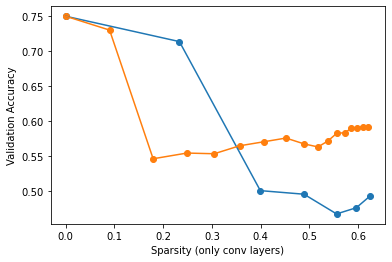

In [7]:

fig, axs = plt.subplots()
axs.scatter(exp4_conv_sparsity, exp4_model_acc_iter)
axs.plot(exp4_conv_sparsity, exp4_model_acc_iter)
axs.scatter(exp5_conv_sparsity, exp5_model_acc_iter)
axs.plot(exp5_conv_sparsity, exp5_model_acc_iter)
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity (only conv layers)")


In [18]:
# prune_ignore_layers for step 5: [8, 51]
# prune_ignore_layers for step 6: [8, 51]
# prune_ignore_layers for step 7: [8, 20, 51]
# prune_ignore_layers for step 8: [8, 20, 51]
# prune_ignore_layers for step 9: [8, 20, 29, 51]
# prune_ignore_layers for step 10: [8, 20, 29, 51, 60, 69]

"""
Attempting to understand the impact of ignore prune layers
"""



nw_cfgs = np.asarray([
[64, 64, 64, 64, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128],
[39, 46, 51, 63, 63, 64, 125, 128,  75, 124, 118, 128, 115, 128],
[35, 35, 44, 57, 58, 63, 121, 124,  50, 110, 106, 118,  96, 123],
[19, 35, 32, 57, 53, 63, 115, 124,  17, 110,  88, 118,  71, 123],
[ 8, 30, 18, 57, 42, 63, 108, 124,   8, 102,  68, 118,  54, 122],
[ 8, 24, 12, 54, 29, 60,  94, 120,   8,  91,  55, 115,  42, 119],
[ 8, 22,  8, 51, 18, 60,  76, 114,   8,  89,  38, 111,  32, 114],
[ 8, 20,  8, 50, 11, 60,  56, 108,   8,  83,  24, 106,  21, 113],
[ 8, 20,  8, 46,  6, 60,  42,  99,   8,  78,  11, 100,  13, 111],
[ 8, 18,  8, 43,  6, 59,  33,  94,   8,  69,   5,  89,   7, 104],
[8, 16,  8, 33,  6, 59,  27,  88,   8,  62,   5,  77,   7,  96],
[8, 15,  8, 27,  6, 58,  22,  79,   8,  52,   5,  68,   7,  91],
[8, 13,  8, 25,  6, 56,  22,  72,   8,  48,   5,  56,   7,  78],
[8, 12,  8, 18,  6, 52,  21,  67,   8,  43,   5,  49,   7,  70],
[8, 12,  8, 14,  6, 49,  20,  64,   8,  38,   5,  40,   7,  61],
[8, 11,  8, 10,  6, 46,  19,  60,   8,  29,   5,  32,   7,  61],
[8, 11,  8,  7,  6, 45,  18,  54,   8,  25,   5,  28,   7,  53]
    ])

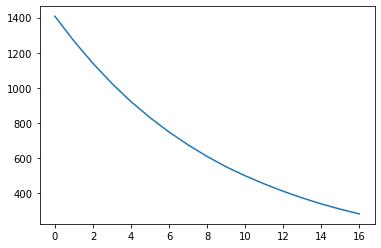

In [21]:
plt.plot(np.sum(nw_cfgs, axis=1))

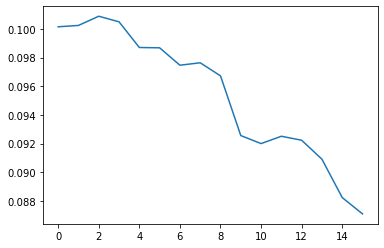

In [23]:
round_total = np.sum(nw_cfgs, axis=1)
plt.plot(-np.diff(round_total)/round_total[:-1])

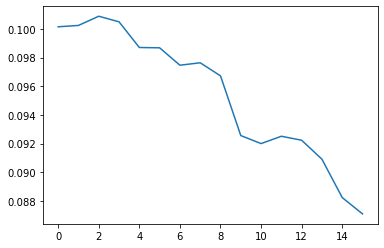

In [25]:
round_total = np.sum(nw_cfgs, axis=1)
plt.plot(-np.diff(round_total)/round_total[:-1])